In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("adult.csv")

In [3]:
df.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)
df.drop(['fnlwgt','educational-num','marital-status','relationship','race'],
        axis=1)

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,United-States,>50K
5,34,Private,10th,Other-service,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Tech-support,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,Machine-op-inspct,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,Adm-clerical,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,Adm-clerical,Male,0,0,20,United-States,<=50K


In [4]:
X=df.drop('income',axis=1)
y=LabelEncoder().fit_transform(df['income'])

In [5]:
X=pd.get_dummies(X)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=2)
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Model Accuracy:",accuracy_score(y_test,y_pred))

Model Accuracy: 0.8344277673545967


In [6]:
cm=confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix:\n",cm)
print("\n Classification report:\n",classification_report(y_test, y_pred))


 Confusion Matrix:
 [[10733   413]
 [ 2058  1720]]

 Classification report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     11146
           1       0.81      0.46      0.58      3778

    accuracy                           0.83     14924
   macro avg       0.82      0.71      0.74     14924
weighted avg       0.83      0.83      0.82     14924



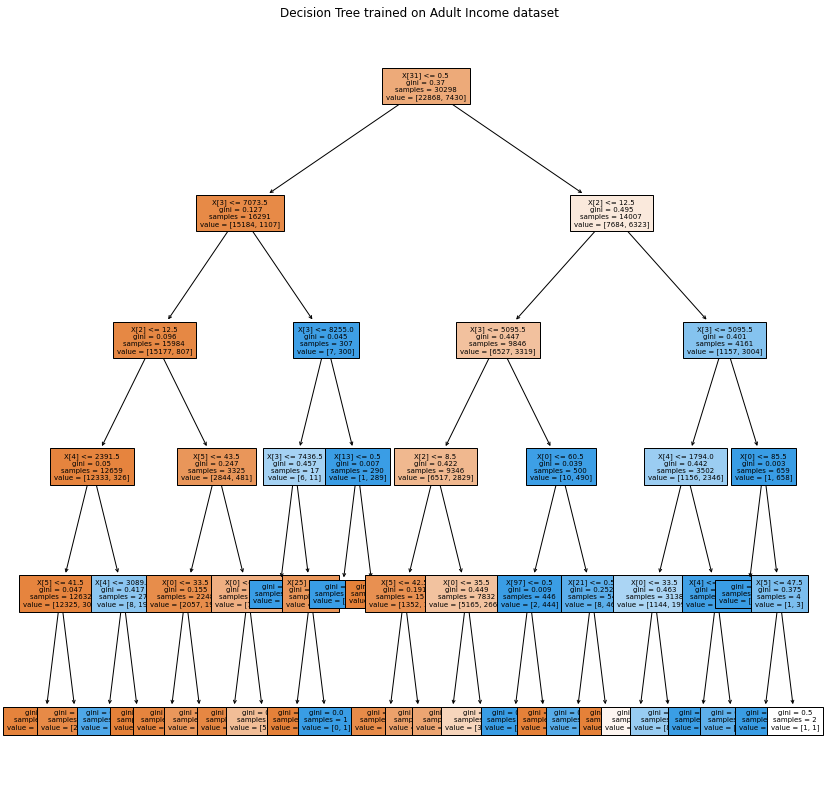

In [7]:
plt.figure(figsize=(14,14))
plot_tree(clf,fontsize=7,filled=True)
plt.title("Decision Tree trained on Adult Income dataset")
plt.show()